# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 6. Линейная регрессия.


**Правила, <font color="red">прочитайте внимательно</font>:**




* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком
    * *или* вставив ее в ноутбук посредством `Edit -> Insert Image` при редактировании markdown-ячейки (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). **<font color="red">Неправильно вставленные фотографии могут не передаться при отправке.</font>** Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* **В решениях поясняйте, чем вы пользуетесь**, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.



**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 40 баллов
* Задача 2 &mdash; 80 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 50 баллов
* Задача 4 &mdash; 60 баллов
* Задача 5 &mdash; 30 баллов


In [ ]:
# Bot check

# HW_ID: fpmi_ad6
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

При решении задания используйте `sklearn`. Пропишите сюда необходимые импорты

In [2]:
import contextlib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### <font color="blue"><i>Легкая часть</i></font>

### Задача 1.

Рассмотрим одномерную линейную регрессию без свободного параметра $y(x) = \theta x$, где $x\in \mathbb{R}$ и $\theta \in \mathbb{R}$. Предполагаем, что данные получены по правилу
$$Y_i = \theta x_i + \varepsilon_i,$$
где $i \in \{1, ..., n\}$, числа $x_i \in \mathbb{R}$ неслучайны, а $\varepsilon_i$ &mdash; случайные ошибки.

**1.** Посчитайте оценку $\widehat{\theta}$ методом наименьших квадратов по явной формуле.

**2.** Выпишите формулы градиентного спуска (GD) и стохастического градиентного спуска (SGD) для поиска $\widehat{\theta}$. Не забудьте указать, как в SGD математически определяется батч (набор объектов на каждой итерации).

**3.** Пусть $\mathsf{E}\varepsilon_i = 0$, а $x \in \mathbb{R}$ &mdash; новый объект. Посчитайте $\mathsf{E}\widehat{\theta}$ и $\mathsf{E}\widehat{y}(x)$, где $\widehat{y}(x) = \widehat{\theta} x$.

**4.** Пусть $\mathsf{E}\varepsilon_i = 0$ и $\mathsf{D}\varepsilon_i = \sigma^2$, причем все $\varepsilon_i$ независимы, а $x \in \mathbb{R}$ &mdash; новый объект. Посчитайте $\mathsf{D}\widehat{\theta}$ и $\mathsf{D}\widehat{y}(x)$, где $\widehat{y}(x) = \widehat{\theta} x$. 

**5.** При каких условиях дисперсии в пункте 4 конечны? Подумайте и ответьте на вопрос, как ведет себя дисперсия предсказания в многомерном случае если матрица $X^T X$ близка к вырожденной.



*Замечания.* 
1. В пунктах 3-5 речь идет о $\widehat{\theta}$, которая является *решением* задачи метода наименьших квадратов. Поэтому пользуйтесь явной формулой этого решения, а не формулами методов вычисления решения.
2. В ответе во всех пунктах могут оставаться суммы $n$ слагаемых, но не должно быть операций с векторами или матрицами.
3. **Прочитай требования к формату решения в правилах сдачи задания.**

## №1
#### Рассмотрим $F(\theta) = \sum_{i=1}^n(Y_i - x_i\theta)^2$.
#### Решаем $F(\theta) \rightarrow \min\limits_{{\theta} \in \mathbb{R}}$
#### $F'(\theta) = \sum_{i=1}^n2x_i(Y_i - x_i\theta)$
#### $F'(\theta) = 0 \iff \theta = \frac{\sum_{i=1}^n Y_i x_i}{\sum_{i=1}^n x_i^2}$
#### Получаем оценку $\widehat{\theta} = \frac{\sum_{i=1}^n Y_i x_i}{\sum_{i=1}^n x_i^2}$


## №2
#### GD:
#### Изначально выберем некоторое приближение $\theta_0$ искомой величины, переход:
#### $\theta_{t+1} = \theta_{t} - \eta \nabla_{\theta_t} F(\theta_t) = \theta_{t} - \eta F'(\theta_t)$, где $\eta$ - шаг спуска
#### $\theta_{t+1} = \theta_{t} - \eta \sum_{i=1}^nx_i(Y_i - x_i\theta_t)$
#### $t \rightarrow \infty \Rightarrow \theta_t \rightarrow \widehat{\theta}$
####
#### SGD:
#### Измение перехода в предыдущем пункте:
#### $\theta_{t+1} = \theta_{t} - \eta \sum_{j=1}^kx_{i_j}(Y_{i_j} - x_{i_j}\theta) {}, \ \{i_1 \dots i_k\} \sim U\{1 \dots n\}$ (с повторениями)
#### (k - гиперпараметр, размер батча)


## №3
#### $\mathsf{E} \widehat{\theta} = \mathsf{E} \frac{\sum_{i=1}^n Y_i x_i}{\sum_{i=1}^n x_i^2} = \mathsf{E} \frac{\sum_{i=1}^n (\theta x_i + \varepsilon_i) x_i}{\sum_{i=1}^n x_i^2}$
#### По линейности матожидания это равно
#### $\mathsf{E} \frac{\sum_{i=1}^n \theta x_i x_i}{\sum_{i=1}^n x_i^2} = \theta$
#### Таким образом $\mathsf{E} \widehat{\theta} = \theta$
#### $\mathsf{E} \widehat{y}(x) = \mathsf{E} (\widehat{\theta} x) = \theta x$

## №4
#### $ \mathsf{D} \widehat{\theta} = \mathsf{D} \frac{\sum_{i=1}^n (\theta x_i + \varepsilon_i) x_i}{\sum_{i=1}^n x_i^2} = \mathsf{D} \frac{\sum_{i=1}^n (\theta x_i^2) + \sum_{i=1}^n (\varepsilon_i x_i)}{\sum_{i=1}^n x_i^2} = \mathsf{D} \theta + \mathsf{D} \frac{\sum_{i=1}^n (\varepsilon_i x_i)}{\sum_{i=1}^n x_i^2} = \mathsf{D} \frac{\sum_{i=1}^n (\varepsilon_i x_i)}{\sum_{i=1}^n x_i^2} = \mathsf{D} (\frac{1}{\sum_{i=1}^n x_i^2} * \sum_{i=1}^n (\varepsilon_i x_i)) = (\frac{1}{\sum_{i=1}^n x_i^2})^2 * \mathsf{D} \sum_{i=1}^n (\varepsilon_i x_i) = $
#### $ = (\frac{1}{\sum_{i=1}^n x_i^2})^2 * \sum_{i=1}^n  x_i^2 \mathsf{D} \varepsilon_i = \frac{\sigma^2}{\sum_{i=1}^n x_i^2} $
#### $ \mathsf{D} \widehat{y}(x) = \mathsf{D} (\widehat{\theta} x) = x^2 \mathsf{D} \widehat{\theta} = \frac{x^2 \sigma^2}{\sum_{i=1}^n x_i^2} $

## №5
#### $ \mathsf{D} \widehat{\theta} < \infty \iff \mathsf{D} \widehat{y}(x) < \infty \iff \exists i \in \{1 \dots n\} : x_i \ne 0 \ and \ \sigma < \infty $
#### По теореме о решении задачи МНК $ \widehat{\theta} = (X^T X)^{-1} X^T Y $
#### $X^{T}X$ близка к вырожденной, $\Rightarrow det(X^T X)^{-1} \rightarrow \infty $
#### $\widehat{\theta} = {\left(X^{T}X\right)}^{-1}X^{T}Y = {\left(X^{T}X\right)}^{-1}X^{T}(X \theta + \varepsilon) = \theta + {\left(X^{T}X\right)}^{-1}X^{T} \varepsilon \Rightarrow \widehat{\theta} \rightarrow \infty $

---
### Задача 2.

Скоро лето &mdash; идеальное время года для путешествий и прогулок на велосипедах. В крупных городах обычно развиты сети проката велосипедов, предоставляющие удобный сервис. Одной из важных задач таких компаний является прогнозирование количества арендованных велосипедов в зависимости от времени года и погодных условий.

Рассмотрим датасет <a target="_blank" href="https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset">Bike Sharing Dataset</a> от компании <a target="_blank" href="https://www.capitalbikeshare.com/">Capital Bikeshare</a>, располагающей автоматизированными пунктами проката велосипедов. В датасете по дням записаны календарная информация и погодные условия, а также число прокатов в этот день. Цель &mdash; предсказать количество арендованных велосипедов по остальным характеристикам.

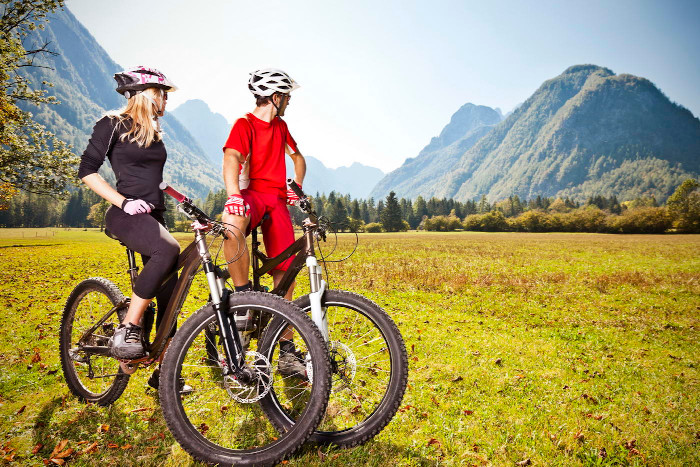

Будем работать только со следующими признаками:
* `season`: время года: 1 &mdash; зима, 2 &mdash; весна, 3 &mdash; лето, 4 &mdash; осень;
* `mnth`: месяц от 1 до 12;
* `holiday`: является ли текущий день праздничным;
* `weekday`: день недели от 0 до 6;
* `workingday`: является ли текущий день рабочим или выходным;
* `weathersit`: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман);
* `temp`: температура в Цельсиях;
* `atemp`: температура по ощущениям в Цельсиях;
* `hum`: влажность воздуха;
* `windspeed`: скорость ветра;
* `cnt`: количество арендованных велосипедов в текущий день.

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html">ноутбук</a> с занятия по линейной регрессии.

---

Скачайте данные, загрузите их с помощью `pandas` и разделите на обучающую и тестовую части в соотношении 4:1. Далее всю аналитику необходимо проводить только на обучающей части данных.

In [3]:
df = pd.read_csv('day.csv')
df.drop(columns=['instant', 'dteday', 'yr', 'casual', 'registered'], inplace=True)
train, test = train_test_split(df, test_size=.2)

categorical_features = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
real_features = ['temp', 'atemp', 'hum', 'windspeed']
target_feature = 'cnt'

#### 1. Визуальный анализ

Посмотрите по графикам, как *целевой признак зависит от остальных* и поймите характер этой зависимости. Старайтесь строит информативные графики.

Какие признаки категориальные, а какие &mdash; вещественные? Учтите это при построении информативных графиков.

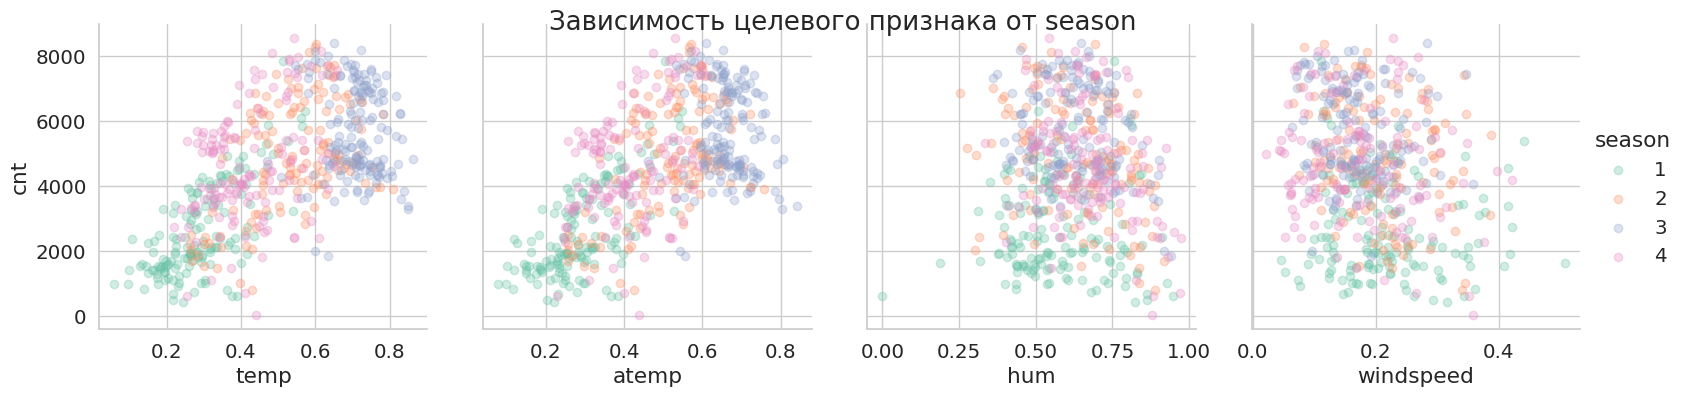

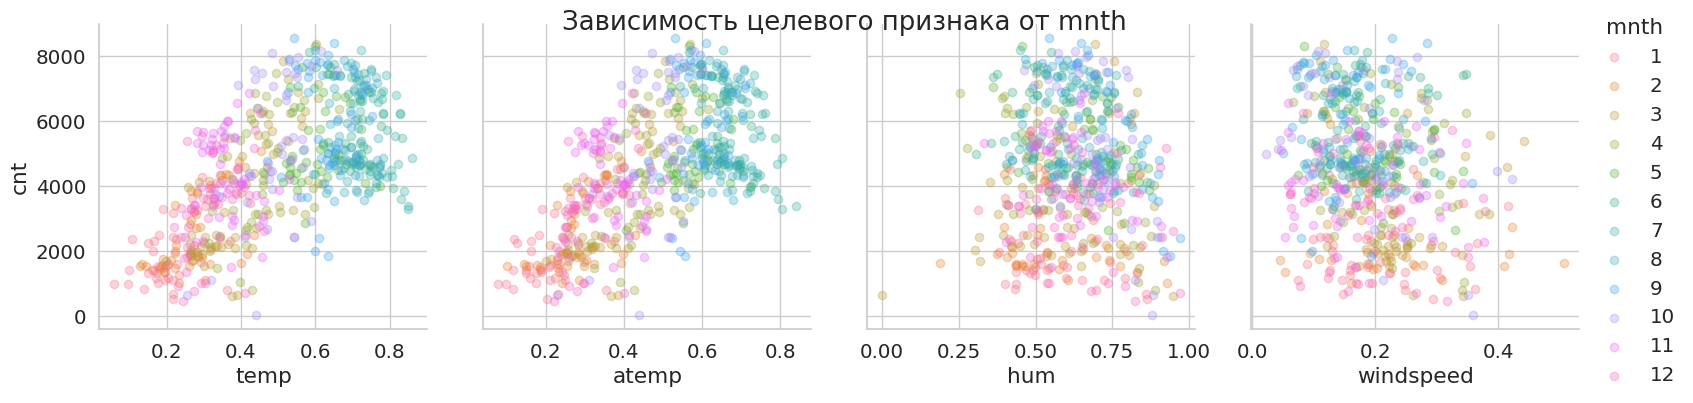

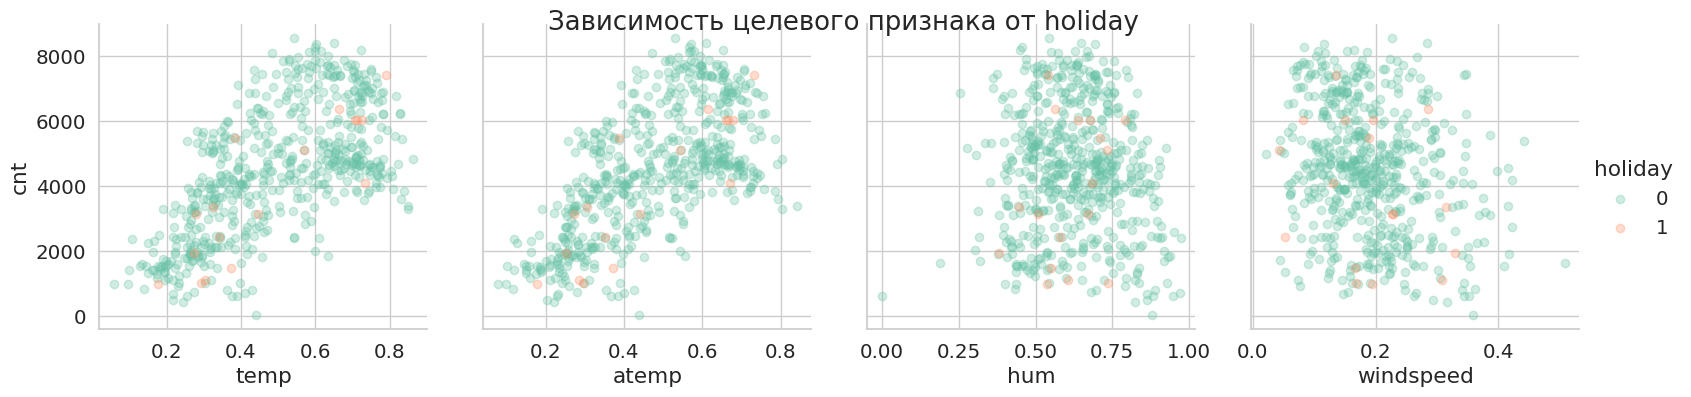

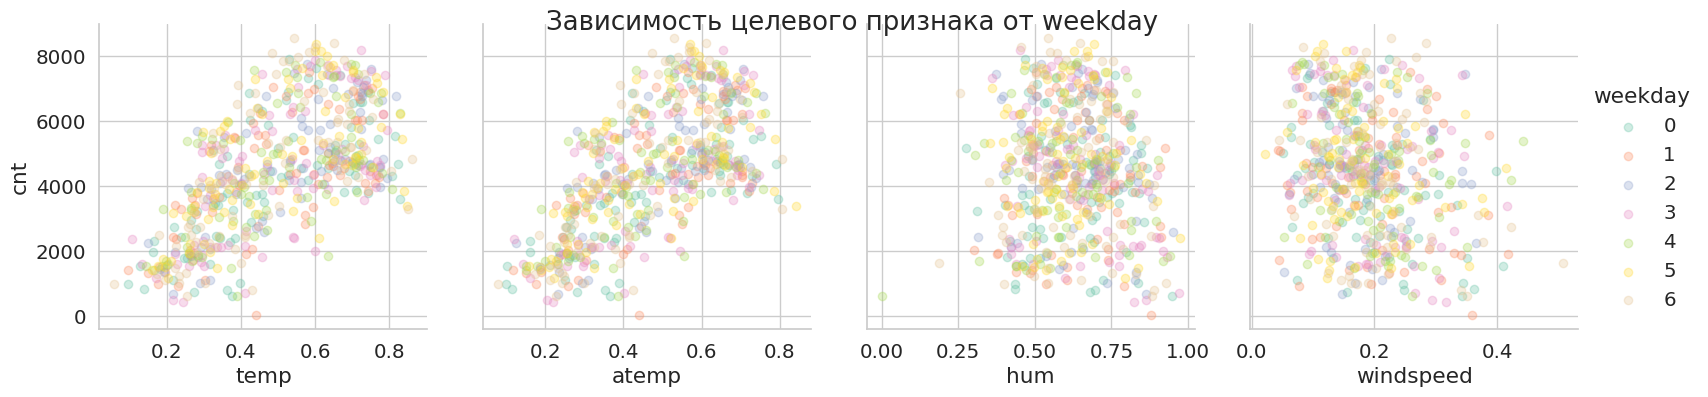

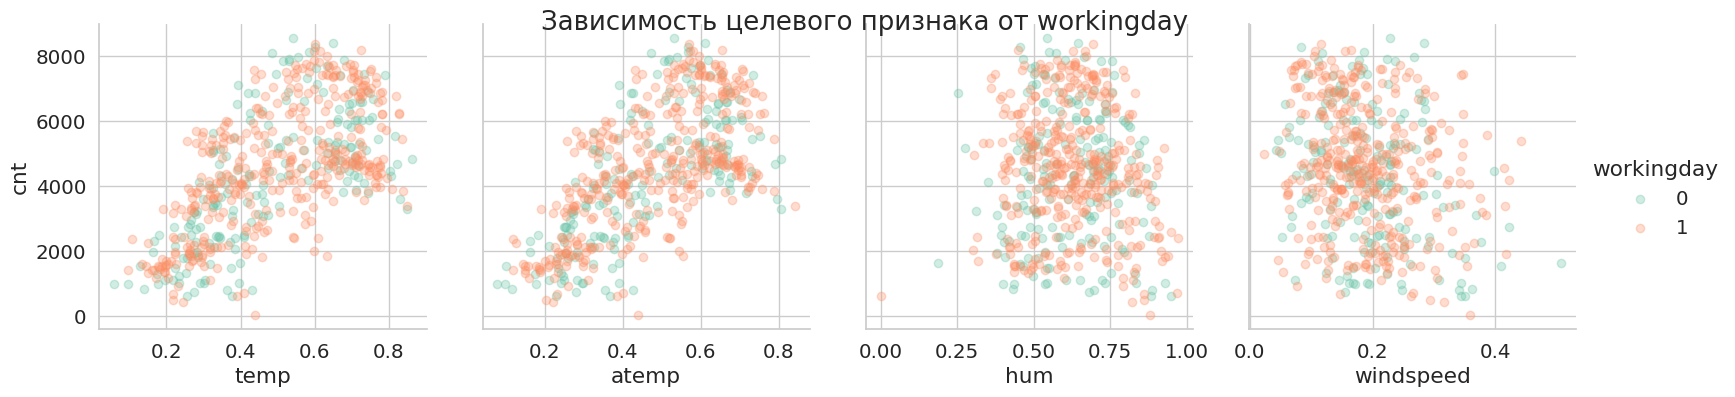

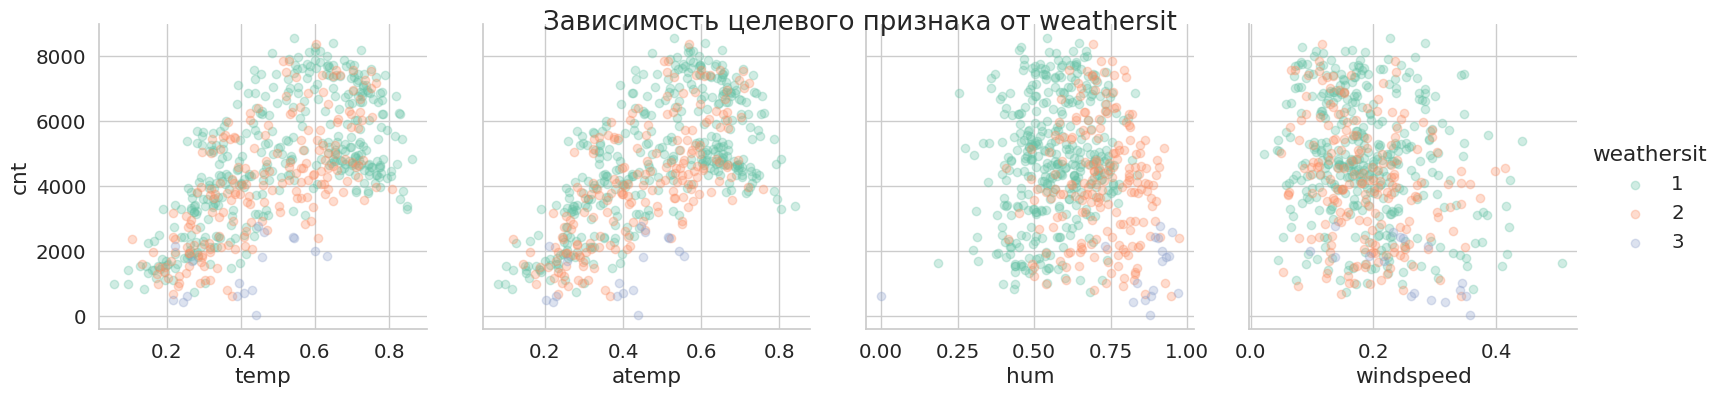

In [67]:
with contextlib.redirect_stderr(None):
    for cf in categorical_features:
        g = sns.PairGrid(
            train, diag_sharey=False, height=4,
            hue=cf, y_vars=target_feature, x_vars=real_features
        )
        g.fig.suptitle(f'Зависимость целевого признака от {cf}')
        g.map(plt.scatter, alpha=0.3)
        g.add_legend()

Сделайте выводы по графикам. В частности, ответьте на следующие вопросы.
* Есть ли в данных явные выбросы, то есть точки, далеко находящиеся от основной массы точек?
* Стоит ли рассматривать какие-либо нелинейные функции от признаков? Не стоит придумывать сложные функции, достаточно рассмотреть $x^2$, $\log x$ и $I\{x > c\}$.

**Выводы по графикам:**
* По каждому вещественному признаку существует несколько точек-выбросов
* Для влажности и скорости ветра не нужно, для температуры - вероятно тоже нет, однако сложно судить в связи с тем что ее значения в таблице какие-то странные (от 0 до 1 круглый год хотя в условии написано что это градусы по Цельсию), по идее стоило бы применить линейную функцию которая бы приближала к среднему очень далекие от него значения (например, особо разницы в количестве велосипедов при -10С и -40С не будет, однако второе значение может подпортить модельку)
* Некоторые пары признаков не имеет смысла рассматривать по отдельности т.к. они очевидно зависимы, например - temp и atemp, season и mnth, weekday и workingday.
* Можно сказать, что temp и weathersit оказывают ключевое влияние на целевой признак.

#### 2. Подготовка данных

Опишите по шагам процедуру предобработки данных, которая будет включать работу с выбросами, преобразования вещественных и категориальных признаков, возможно, что-то еще.

**Процедура предобработки данных:**

1) Избавимя от выбросов, обрезав данные.
2) Избавимся от лишних полей.
3) Закодируем категориальные признаки с помощью `OneHotEncoder`, отбросив один по 1 бинарному признаку.

Реализуйте данную процедуру.

In [4]:
cat_feat_new = ['mnth', 'holiday', 'weekday', 'weathersit']
re_feat_new = ['temp', 'hum', 'windspeed']


def cut_data(data):
    return data[
        (data.hum.quantile(0.01) < data.hum) & (data.hum < data.hum.quantile(0.99)) &
        (data.temp.quantile(0.01) < data.temp) & (data.temp < data.temp.quantile(0.99)) &
        (data.windspeed.quantile(0.01) < data.windspeed) & (data.windspeed < data.windspeed.quantile(0.99))
        ]


cut_train = cut_data(train)
encoder = OneHotEncoder(drop='first', sparse_output=False)
train_cat = encoder.fit_transform(cut_train[cat_feat_new])
X_train = np.hstack([cut_train[re_feat_new], train_cat])

#### 3. Обучение модели и ее анализ

Обучите линейную регрессию из `sklearn` на полученных данных и посмотрите на полученные оценки коэффициентов (в т.ч. свободный коэффициент).

In [5]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train, cut_train[target_feature])

LinearRegression()

In [6]:
print("Коэффициенты:\n", model.coef_)
print("Свободный коэффициент: ", model.intercept_)

Коэффициенты:
 [ 7579.89218141 -3726.81525311 -4456.31176479    39.97850346
   575.05440284   824.40042749   599.2167092     84.60849136
  -362.47541596  -178.77417044  1077.8666241   1592.84084614
  1242.2005018    818.64372603  -837.72126038   161.82241772
   152.43964814   185.62308713   280.7837807    234.52870902
   584.32571681  -171.86167678 -1486.25546504]
Свободный коэффициент:  3384.4256032218123


Посчитайте ошибку предсказания на тестовой выборке по метрикам RMSE, MAE, MAPE. Подробнее можно почитать в <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#3.-Тестирование-и-оценка-качества">ноутбуке</a> с занятия.

*Замечание.* Если в тестовой части тоже есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать, но в то же время выбросы вносят существенный вклад в значение метрики. 

In [7]:
cut_test = cut_data(test)
test_cat = encoder.transform(cut_test[cat_feat_new])
X_test = np.hstack([cut_test[re_feat_new], test_cat])
test_predictions = model.predict(X_test)

In [8]:
def print_metrics(real, predictions):
    print("RMSE: ", metrics.mean_squared_error(real, predictions) ** 0.5)
    print("MAE: ", metrics.mean_absolute_error(real, predictions))
    print("MAPE: ", metrics.mean_absolute_percentage_error(real, predictions) * 100)

In [9]:
print_metrics(cut_test[target_feature], test_predictions)

RMSE:  1248.46476113701
MAE:  1081.072219332401
MAPE:  34.29592576406244


Попробуйте посчитать оценку коэффициентов с помощью формулы, полученной на занятии. Не забудьте про константный признак.

In [10]:
def add_ones(x):
    return np.hstack([np.ones([x.shape[0], 1]), x])


def calculate_cfs(x, y):
    return np.linalg.inv(x.T @ x) @ x.T @ y


cfs = calculate_cfs(add_ones(X_train), np.array(cut_train[target_feature]))
new_test_predictions = add_ones(X_test) @ cfs

print("Коэффициенты:\n", cfs, "\n")
print("Kонстантный признак: ", cfs[0], "\n")
print_metrics(cut_test[target_feature], new_test_predictions)

Коэффициенты:
 [ 3384.42560322  7579.89218141 -3726.81525311 -4456.31176479
    39.97850346   575.05440284   824.40042749   599.2167092
    84.60849136  -362.47541596  -178.77417044  1077.8666241
  1592.84084614  1242.2005018    818.64372603  -837.72126038
   161.82241772   152.43964814   185.62308713   280.7837807
   234.52870902   584.32571681  -171.86167678 -1486.25546504] 

Kонстантный признак:  3384.425603221752 

RMSE:  1248.4647611370106
MAE:  1081.0722193324054
MAPE:  34.29592576406255


В чем заключается проблема?

В этом случае проблемы не возникло т.к. я изначально преобразовывал данные, однако она должна была быть по причине того что в исходных данных многие поля зависят друг от друга $\Rightarrow X^T X$ близка к вырожденной $\Rightarrow$ коэффициенты будут очень большими и метрики сильно ухудшатся (выростут в несколько раз)

Исправьте эту проблему, посчитайте оценки коэффициентов, а также ошибку предсказания.

Уже сделано

Сделайте выводы.

**Выводы:**
Построение модели на зависимых данных приводит к неправильной работе модели, поэтому такие данные стоит исключать, а понять что от чего зависит мне помогли графики и здравый смысл. Однако слишком мало данных тоже могут привести к плохой точности.
В конце концов мы научились предсказывать количество арендованных велосипедов и протестировали на тестовой выборке, посчитав ошибки по метрикам, получили, например, `MAPE` около 33%
Стоит заметить, что при правильной изначальной обработке данных точность предсказаний при помоши `sklearn` оказалась практически такой же как по формуле с занятия.

*Замечание.* Не расстраивайтесь, если у вас получится не очень хорошее качество, это нормально. Вы провели только небольшую предобработку данных и обучили *простую* модель. Более сложные методы обработки данных и обучения ждут вас впереди. Главное &mdash; с чего-то начать!

### <font color="orange"><i>Сложная часть</i></font>

### Задача 3.

Как можно было увидеть ранее, оценки коэффициентов становятся слишком большими при наличии некоторых проблем с данными. Чтобы этого не происходило, часто выполняют процедуру *регуляризации* в модели. 

Пусть $X \in \mathbb{R}^{n \times d}$ &mdash; матрица признаков, $Y \in \mathbb{R}^{n}$ &mdash; вектор значений целевого признака, $\theta \in \mathbb{R}^{d}$ &mdash; неизвестный вектор параметров. В методе наименьших квадратов решается задача
$$\| Y - X\theta \|^2 \longrightarrow \min_\theta.$$
Регуляризация заключается в искусственном усечении значений вектора оценок коэффициентов путем добавления его нормы к оптимизируемому функционалу. Тем самым решается задача
$$\| Y - X\theta \|^2 + \lambda \| \theta \|^2 \longrightarrow \min_\theta,$$
где $\lambda > 0$ &mdash; гиперпараметр модели, то есть число, которое задается пользователем. Такая модель называется **Ridge-регрессией**.

*Замечание.* Такая модель дает некоторое *другое приближение* неизвестной зависимости. Но неправильно думать, что она не может дать "правильный" ответ, потому как понятия "правильный ответ" в подобных задачах не существует. Можно получить только *более качественное приближение* согласно выбранной метрике, например, RMSE.

**1.** Найдите оценку $\theta$ в модели ridge-регрессии. Сравните ее с оценкой коэффициентов в методе наименьших квадратов. Помогает ли она избавиться от проблемы обратимости матрицы в МНК, которая обсуждалась на занятии?

$$ F(\theta) = \| Y - X\theta \|^2 + \lambda \| \theta \|^2$$
$$ F(\theta) = Y^TY - 2Y^TX\theta + \theta^TX^TX\theta + \lambda\theta^2 $$
$$ F(\theta) \rightarrow \min_\theta $$
$$ \nabla_\theta F(\theta) = -2X^TY + 2X^TX\theta + 2\lambda\theta $$
$$ \nabla_\theta F(\theta) = 0 \Rightarrow 2X^TY = (2X^TX + 2\lambda E)\theta $$
$$ \Rightarrow \widehat{\theta} = (X^TX + \lambda E)^{-1} X^TY $$

<p style="text-align: center;">Данный способ оценки решает проблему обратимости матрицы так как в данном случае она будет далека от вырожденной</p>

 **2.** Выпишите формулу поиска оценки коэффициентов методом *градиентного спуска* и *стохастического градиентного спуска* для модели ridge-регрессии. Не забудьте указать, как математически определяется батч (набор объектов на каждой итерации).

<p style="text-align: center;">GD</p>

  $$ \theta_{t+1} = \theta_{t} - \eta \nabla_{\theta_t} F(\theta_t) = \theta_{t} - \eta (-X^TY + X^TX\theta_t + \lambda\theta_t) $$
  $$ t \rightarrow \infty \Rightarrow \theta_t \rightarrow \widehat{\theta} $$ 

<p style="text-align: center;">SGD</p>

  $$ \theta_{t+1} = \theta_{t} - \eta (-X^T_IY_I + X^T_IX_I\theta_t + \lambda\theta_t) $$
  $$ (I = \{i_1 \dots i_k\} \sim U\{1 \dots n\}) $$
<p style="text-align: center;">Образно говоря, $I$ это "срезка" размера $k$ наших начальных данных</p>

**3.** Многие модели машинного обучения требуют *стандартизацию признаков*. Существует множество различных способов стандартизации, из которых наиболее распространены два следующих.
1. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html"><it>StandardScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ &mdash; выборочное среднее значение признака $j$ (функция `np.mean`), а $s^2_j$ &mdash; выборочную дисперсию признака $j$ (функция `np.var`). Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{s_j}.$$
2. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html"><it>MinMaxScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ и $M_j$ &mdash; минимальное и максимальное значения признака $j$ соответственно. Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{M_j - m_j}.$$

Для метода наименьших квадратов стандартизацию признаков можно не производить, однако для модели ridge-регрессии стандартизация необходима. Поясните это. Можно представить, что признаки имеют некоторые различные единицы измерения.

Из-за разницы в единицах измерения какой-нибудь коэффициент члена $\lambda \| \theta \|^2$ может быть очень большим и вместо решения исходной задачи мы будем минимизировать его.

### Задача 4.

В данной задаче мы продолжим анализировать данные велопроката из задачи 2.

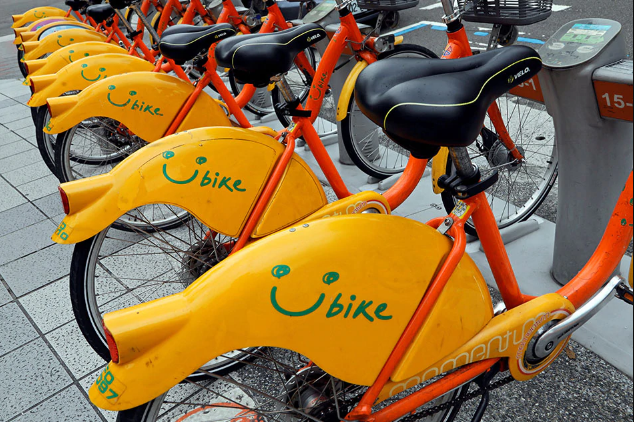

Для начала реализуйте класс для работы с моделью ridge-регрессии, используя явную формулу из предыдущей задачи. Интерфейс этого класса соответствует стандарту библиотеки `sklearn`, который использует также множество других библиотек.

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
class RidgeRegression:
    def __init__(self, lambd=0.1, fit_intercept=True):
        """
        Инициализация модели.

        Аргументы:
        lambd -- параметр регуляризации.
        fit_intercept -- добавить ли константный признак.
        """

        self.wh_theta = None
        self.lambd = lambd
        self.fit_intercept = fit_intercept

    def __add_intercept(self, X):
        return np.hstack([X, np.ones((X.shape[0], 1))]) if self.fit_intercept else X

    def fit(self, X, Y):
        """
        Обучение модели ridge-регрессии.

        Аргументы:
        X -- numpy-матрица объект-признак размера (n, d);
        Y -- numpy-вектор значений целевого признака размера (n,).
        """
        X = self.__add_intercept(X)
        self.wh_theta = np.linalg.inv(X.T @ X + self.lambd * np.eye(X.shape[1])) @ X.T @ Y

    def predict(self, X):
        """
        Вычисление предсказаний.

        Аргументы:
        X -- numpy-матрица объект-признак размера (n, d);

        Возвращает:
        predictions -- предсказания в виде numpy-вектора размера (n,).
        """

        return self.__add_intercept(X) @ self.wh_theta

Разделите данные на три части &mdash; обучающую, валидационную и тестовую в соотношении 3:1:1. На первой из них вам необходимо проводить всю аналитику и обучать все модели &mdash; регрессию, скалирование и т.д.. Вторую вы будете использовать для выбора оптимального значения гиперпараметра. Наконец, тестовую выборку необходимо использовать только для вычисления итогового значения метрик выбранной модели. Именно эти числа вам нужно говорить заказчику.

Подробнее посмотрите в <a href="https://miptstats.github.io/courses/ad_fivt/ML_pipeline.pdf">презентации</a> с занятия.

In [53]:
train, test_validate = train_test_split(df, test_size=.4)
test, validate = train_test_split(test_validate, test_size=.5)

Выполните необходимые преобразования признаков. Не забудьте, что <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#2.-Обучение">обучить преобразования</a> нужно только по обучающей выборке. Учтите все особенности, которые обсуждались ранее в данном задании.

In [54]:
encoder = OneHotEncoder(drop='first', sparse_output=False)


def prepare(data):
    data = cut_data(data)
    with contextlib.redirect_stderr(None):
        data[re_feat_new] = StandardScaler().fit_transform(data[re_feat_new])
    data_cat = encoder.fit_transform(data[cat_feat_new])
    X_data = np.hstack([data[re_feat_new], data_cat])
    return X_data, data


X_train, cut_train = prepare(train)
X_test, cut_test = prepare(test)
X_validate, cut_validate = prepare(validate)

Определите сетку значений гиперпараметра $\lambda$ и обучите для каждого значения сетки модель ridge-регрессии. Обычно эффективнее брать сетку в логарифмическом масштабе, воспользовавшись `np.logspace`.

In [55]:
lambda_range = np.logspace(-2, 3, num=500)
models = []

for lambd in lambda_range:
    model = RidgeRegression(lambd)
    model.fit(X_train, cut_train[target_feature])
    models.append(model)

Для каждой из них посчитайте ошибку по метрикам RMSE, MAE, MAPE по обучающей и валидационной выборкам. Подробнее можно почитать в <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#3.-Тестирование-и-оценка-качества">ноутбуке</a> с занятия.

In [56]:
RMSE_train = [
    metrics.mean_squared_error(cut_train[target_feature], model.predict(X_train)) ** 0.5
    for model in models
]
RMSE_validate = [
    metrics.mean_squared_error(cut_validate[target_feature], model.predict(X_validate)) ** 0.5
    for model in models
]
MAE_train = [
    metrics.mean_absolute_error(cut_train[target_feature], model.predict(X_train))
    for model in models
]
MAE_validate = [
    metrics.mean_absolute_error(cut_validate[target_feature], model.predict(X_validate))
    for model in models
]
MAPE_train = [
    metrics.mean_absolute_percentage_error(cut_train[target_feature], model.predict(X_train)) * 100
    for model in models
]
MAPE_validate = [
    metrics.mean_absolute_percentage_error(cut_validate[target_feature], model.predict(X_validate)) * 100
    for model in models
]

Для каждой метрики постройте графики зависимости значений метрики от значения гиперпараметра. Сравните поведение значений метрик для обучающей и валидационной выборок.

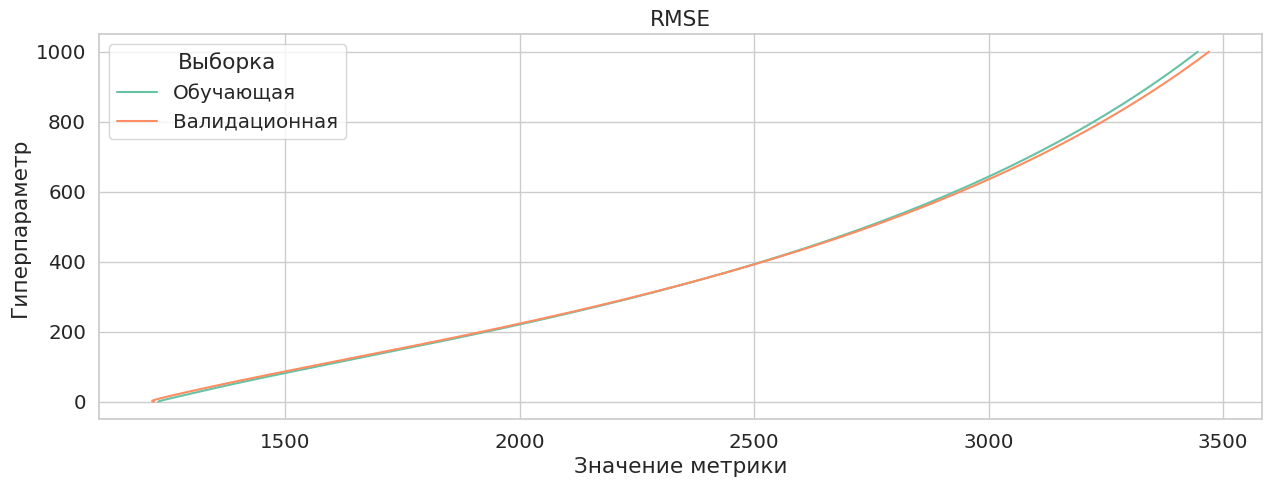

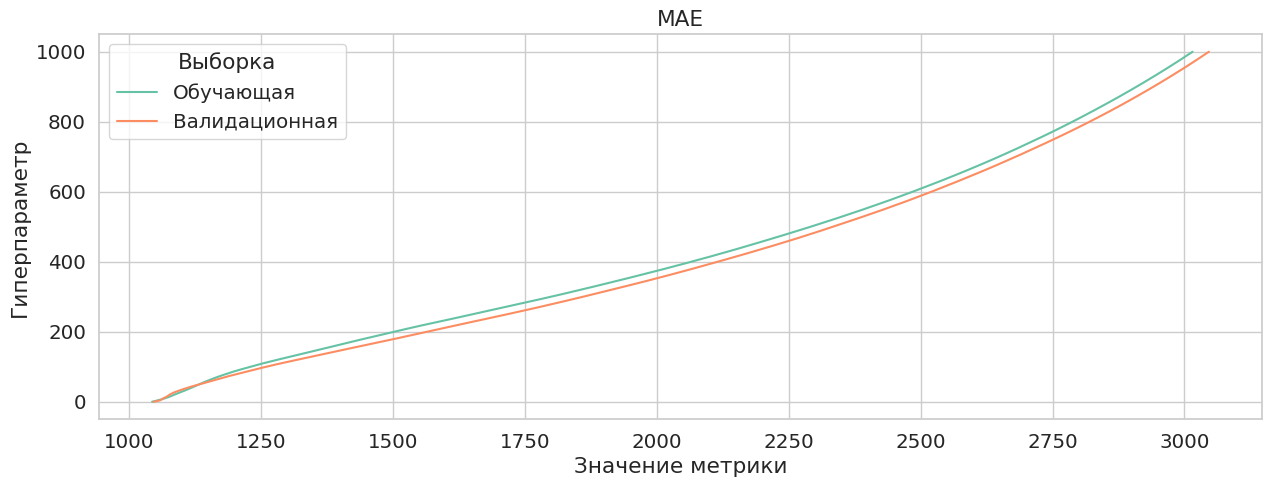

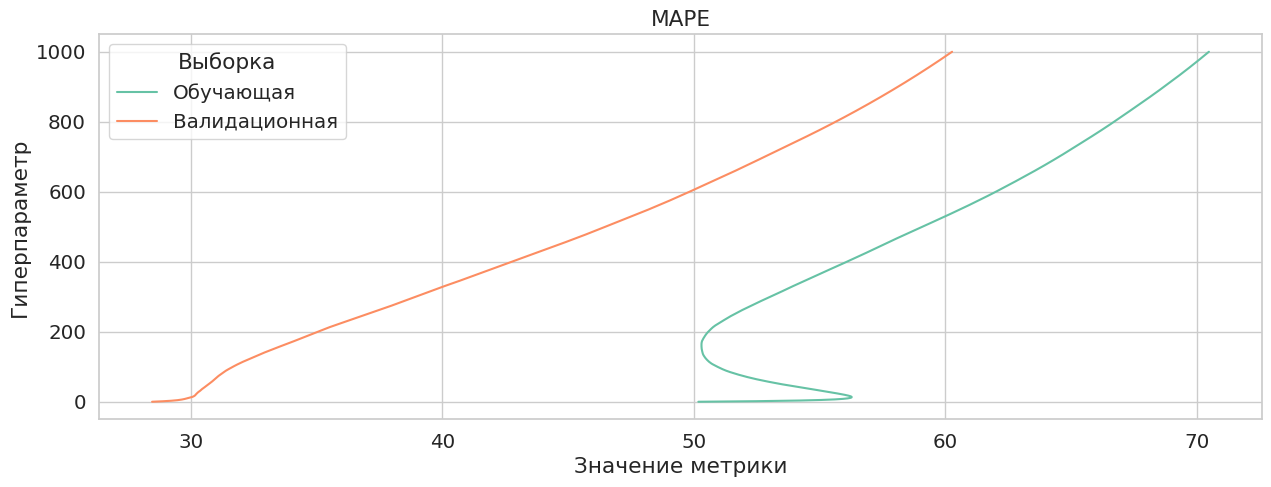

In [57]:
def make_plot(train_metric, validate_metric, name, ):
    plt.figure(figsize=(15, 5))
    plt.plot(train_metric, lambda_range)
    plt.plot(validate_metric, lambda_range)
    plt.title(name)
    plt.legend(['Обучающая', 'Валидационная'], title='Выборка')
    plt.xlabel('Значение метрики')
    plt.ylabel('Гиперпараметр')
    return plt.gcf()

with contextlib.redirect_stderr(None):
    make_plot(RMSE_train, RMSE_validate, 'RMSE').show()
    make_plot(MAE_train, MAE_validate, 'MAE').show()
    make_plot(MAPE_train, MAPE_validate, 'MAPE').show()

Постройте также на одном графике кривые зависимости значений оценок коэффициентов от значений гиперпараметра. Какая наблюдается зависимость? Как вы это можете охарактеризовать?

*Замечание*. Возможно, будет информативнее рисовать графики в логарифмическом масштабе. Для наглядности можно также попробовать рисовать одним цветом все кривые, которые относятся к одному *исходному* признаку.

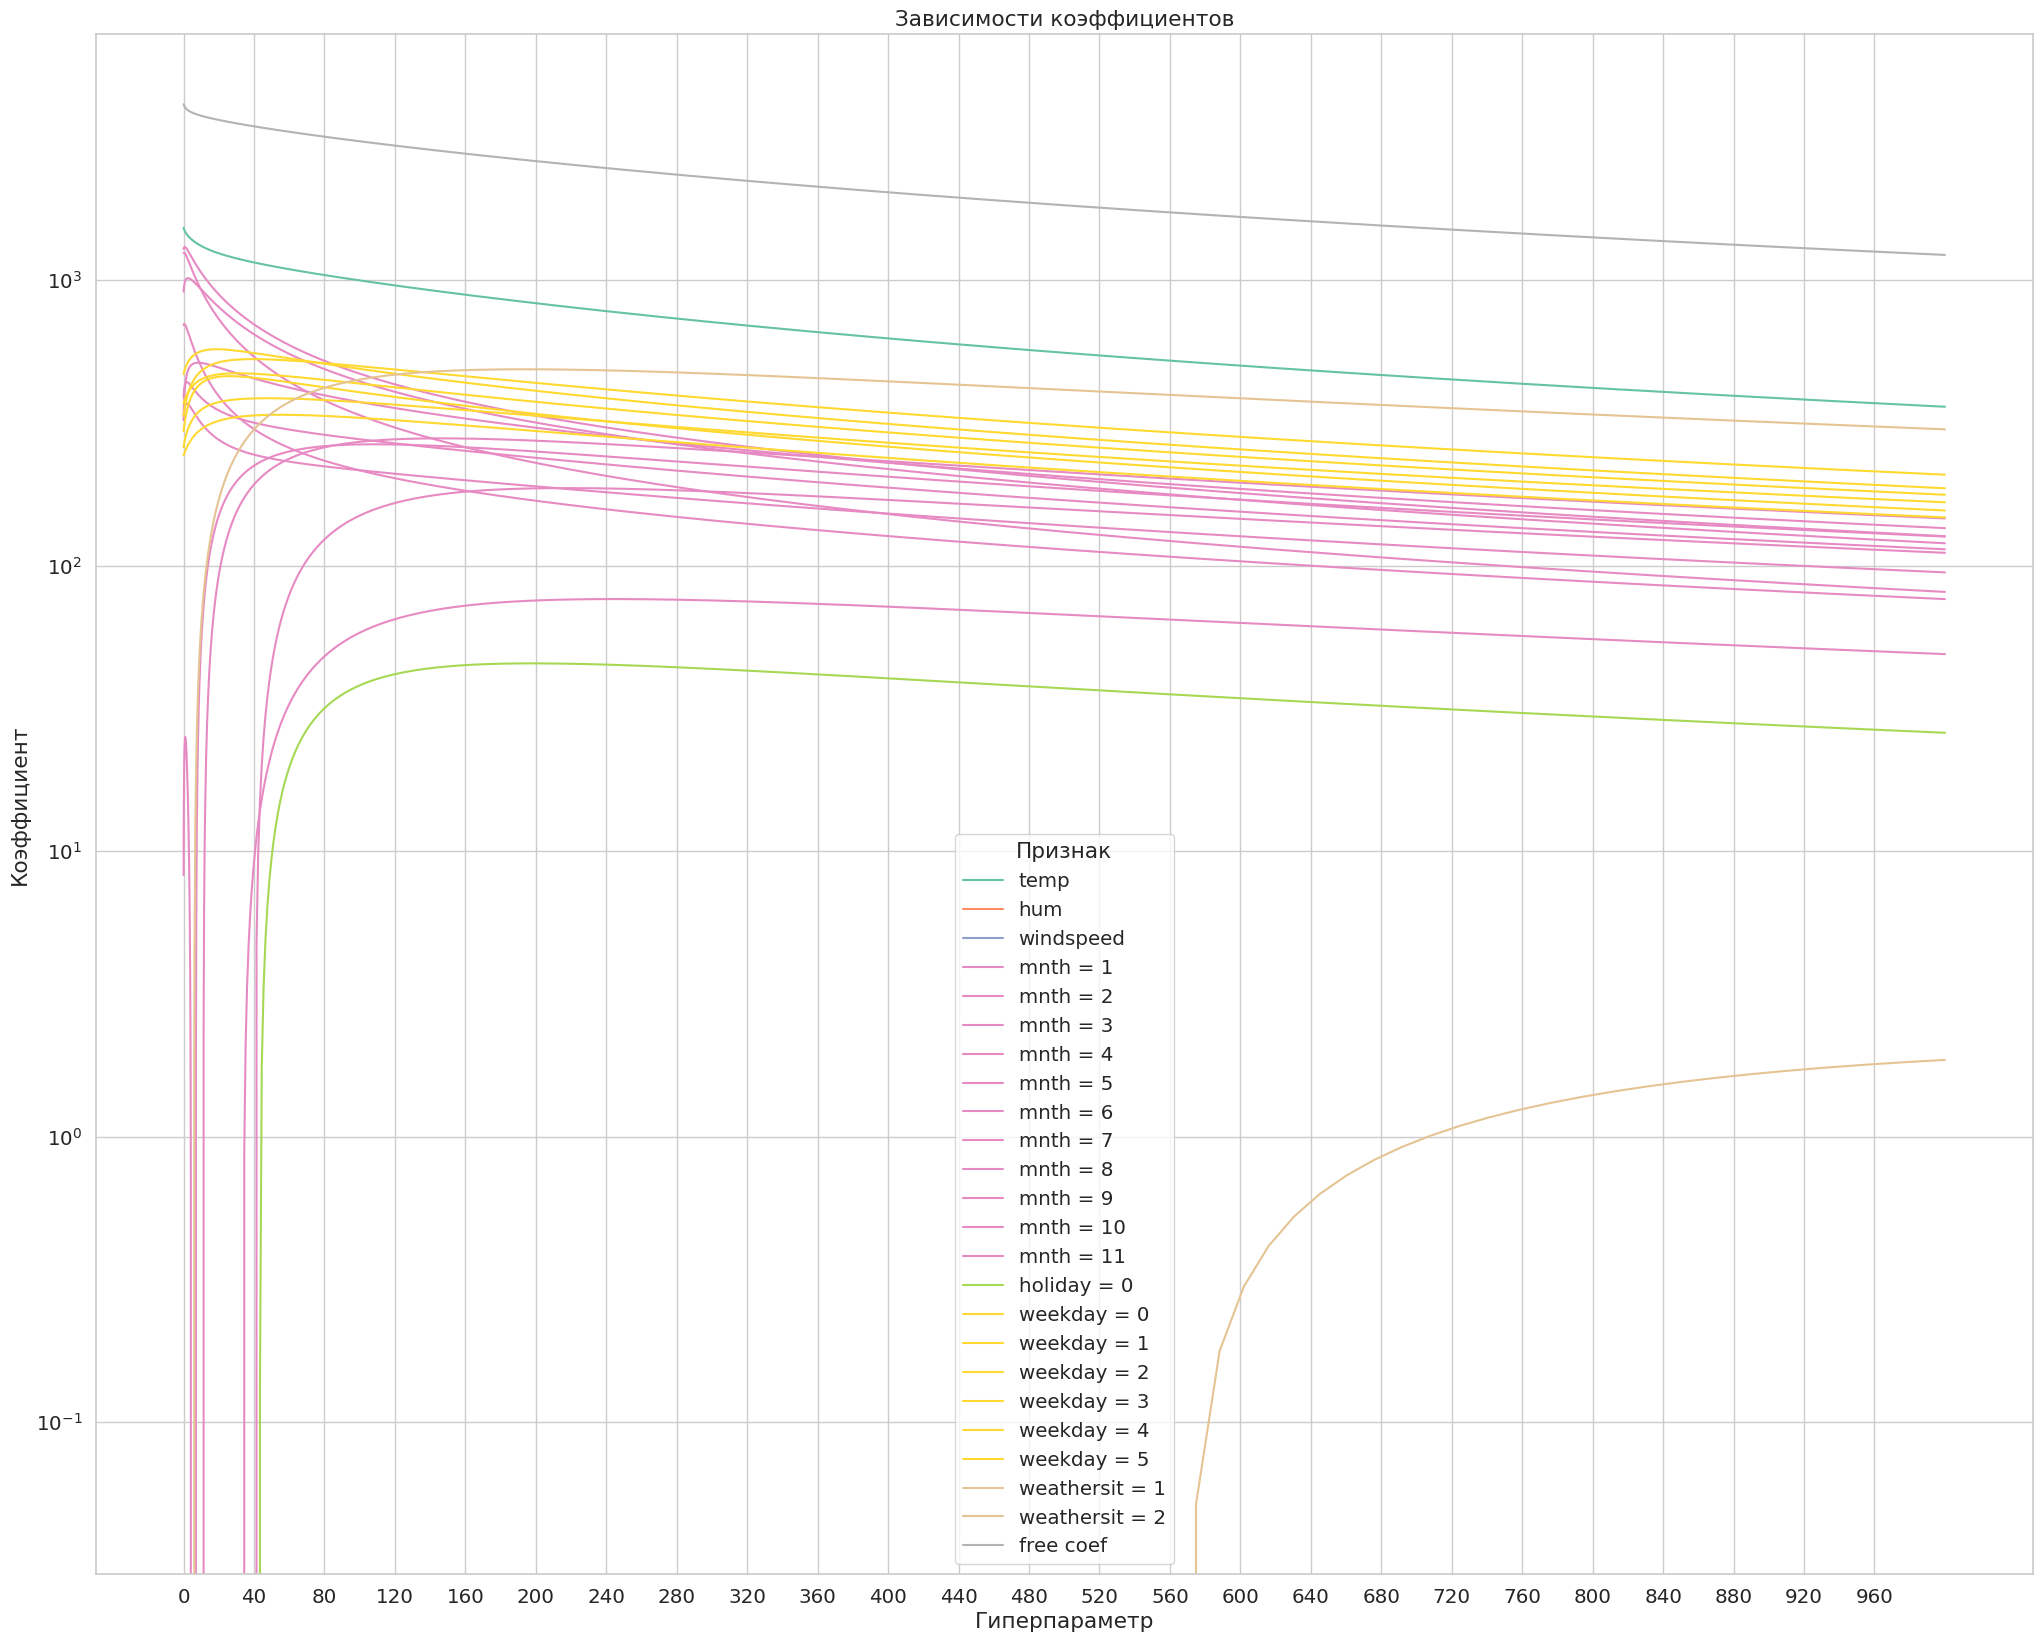

In [58]:
labels = []

labels += re_feat_new
for i in [
    [cat_name+" = "+str(x) for x in cat_value[:-1]]
    for cat_name, cat_value in zip(encoder.feature_names_in_, encoder.categories_)
]:
    labels += i
labels += ["free coef"]


colors = sns.color_palette(n_colors=8)
colors = colors[:3] + [colors[3] for _ in range(11)] + [colors[4]] + \
         [colors[5] for _ in range(6)] + [colors[6] for _ in range(2)] + [colors[7]]

plt.figure(figsize=(25, 20))
for i, param in enumerate(np.array([model.wh_theta for model in models]).T):
    plt.plot(lambda_range, param, label=labels[i], color=colors[i])
plt.legend(title='Признак')
plt.title("Зависимости коэффициентов")
plt.xlabel("Гиперпараметр")
plt.ylabel("Коэффициент")
plt.yscale('log')
plt.xticks(np.arange(0, 1000, 40))
plt.show()

Зависимость наблюдается обратная, визуально напоминающая гиперболы, по причине того, что при слишком большом $\lambda$ в $F(\theta) = \| Y - X\theta \|^2 + \lambda \| \theta \|^2 \rightarrow \min_\theta$ приходится насильно уменьшать $\theta$

Выберите оптимальное значение гиперпараметра и посчитайте ошибку на тестовой выборке.

Визуально хочется взять лямбду где-то около 30, пусть будет 27.

In [64]:
model = RidgeRegression(lambd=27)
model.fit(X_train, cut_train[target_feature])
predicts = model.predict(X_test)

print_metrics(cut_test[target_feature], predicts)

RMSE:  1396.8775996527038
MAE:  1103.7618920976624
MAPE:  28.84915129647032


 Сделайте выводы.
1) Гиперпараметр ridge-регрессии позволяет нам избежать чрезмерно больших коэффициентов в случае зависимых данных, а следовательно улучшить точность предсказаний, в моем случае, например, метрика MAPE уменьшилась процента на 4.
2) Коэффициенты регрессии напрямую зависят от гиперпараметра (см. вывод графика), при $\lambda \rightarrow \infty$ они тоже устремляются к каким-то значениям.

### Задача 5.

Предположим, что имеющиеся у нас данные по велопрокату &mdash; большие данные. Конечно же в реальности это не так. Однако, для простой учебной задачи это в самый раз, чтобы ничего ни у кого не подвисало.

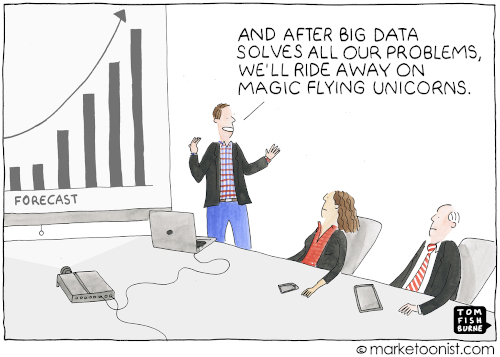

Выберите некоторое начальное приближение оценок коэффициентов, например, в начале координат.

In [217]:
train, test_validate = train_test_split(df, test_size=.4)
test, validate = train_test_split(test_validate, test_size=.5)

X_train, cut_train = prepare(train)
X_test, cut_test = prepare(test)
X_validate, cut_validate = prepare(validate)

X_train.shape

(409, 23)

In [218]:
d = X_train.shape[1]
coefficient = np.zeros(d)

Реализуйте процедуру стохастического градиентного спуска для поиска оценок коэффициентов в модели ridge-регрессии. Размер батча (набор объектов на каждой итерации) обычно берут кратно степени двойки, например, 128 или 256. Значение $\lambda$ можно взять из предыдущей задачи.

In [219]:
lambd = 27
eta = 1e-5
batch = 128
sgd_range = np.arange(10000)

X_ = X_train
Y_ = cut_train[target_feature]

coefficients = [coefficient]

for _ in sgd_range:
    indexes = [int(x) for x in np.round(np.random.uniform(0, X_train.shape[0] - 1, batch))]
    X = np.array([X_[i] for i in indexes])
    Y = np.array([Y_[Y_.index[i]] for i in indexes])
    cff = coefficients[-1]
    cfff = cff - eta * (-X.T @ Y + (X.T @ X + lambd * np.eye(d)) @ cff)
    coefficients.append(cfff)

Нарисуйте графики зависимости значений метрик RMSE, MAE, MAPE от номера итерации для обучающей и валидационной выборок. Сколько итераций пришлось совершить?

In [220]:
RMSE_train = [
    metrics.mean_squared_error(cut_train[target_feature], X_train @ coef) ** 0.5 for coef in coefficients[1:]
]
RMSE_validate = [
    metrics.mean_squared_error(cut_validate[target_feature], X_validate @ coef) ** 0.5 for coef in coefficients[1:]
]
MAE_train = [
    metrics.mean_absolute_error(cut_train[target_feature], X_train @ coef) for coef in coefficients[1:]
]
MAE_validate = [
    metrics.mean_absolute_error(cut_validate[target_feature], X_validate @ coef) for coef in coefficients[1:]
]
MAPE_train = [
    metrics.mean_absolute_percentage_error(cut_train[target_feature], X_train @ coef) * 100 for coef in coefficients[1:]
]
MAPE_validate = [
    metrics.mean_absolute_percentage_error(cut_validate[target_feature], X_validate @ coef) * 100 for coef in coefficients[1:]
]

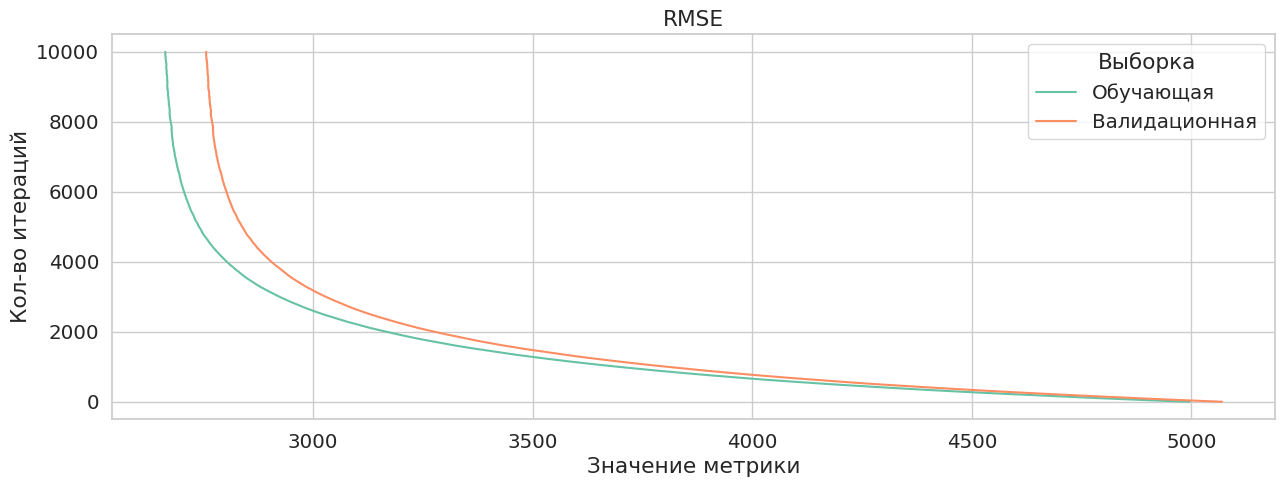

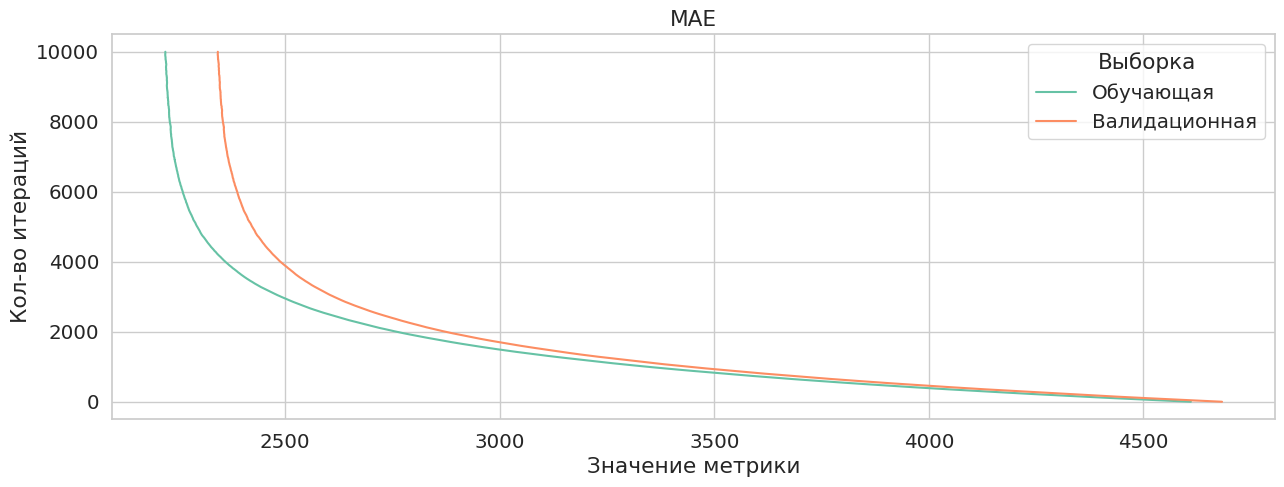

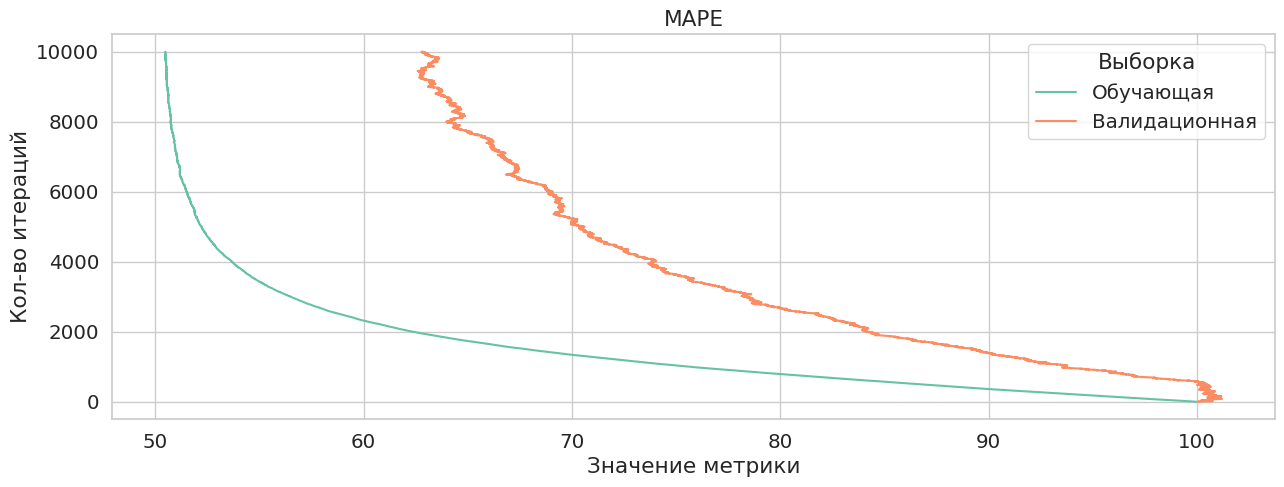

In [221]:
def iter_metrics_plot(train_metric, validate_metric, name):
    plt.figure(figsize=(15, 5))
    plt.plot(train_metric, sgd_range)
    plt.plot(validate_metric, sgd_range)
    plt.title(name)
    plt.legend(['Обучающая', 'Валидационная'], title='Выборка')
    plt.xlabel('Значение метрики')
    plt.ylabel('Кол-во итераций')
    return plt.gcf()

with contextlib.redirect_stderr(None):
    iter_metrics_plot(RMSE_train, RMSE_validate, 'RMSE').show()
    iter_metrics_plot(MAE_train, MAE_validate, 'MAE').show()
    iter_metrics_plot(MAPE_train, MAPE_validate, 'MAPE').show()

Необходимым кол-вом итерации оказалось около 8000

Посчитайте ошибку на тестовой выборке.

In [222]:
print_metrics(cut_test[target_feature], X_test @ coefficients[-1])

RMSE:  2412.6887053038213
MAE:  1923.8989727267556
MAPE:  46.22334659687415


Сделайте выводы.
SGD дал результаты значительно хуже, чем например ridge-регрессия, скорее всего сказалось небольшое кол-во данных.